# Module Project: Ridge Regression

For this project, you'll return to the Tribecca Condo dataset. But this time, you'll look at the _entire_ dataset and try to predict property sale prices.

The [NYC Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) has a glossary of property sales terms and NYC Building Class Code Descriptions. The data comes from the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two subset your dataset to one-family dwellings whose price is between \\$100,000 and \\$2,000,000.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `OneHotEncoder`, and transform `X_train` and `X_test`.
- **Task 7:** Build and train a `LinearRegression` model.
- **Task 8:** Build and train a `Ridge` model.
- **Task 9:** Calculate the training and test mean absolute error for your `LinearRegression` model.
- **Task 10:** Calculate the training and test mean absolute error for your `Ridge` model.
- **Task 11:** Create a horizontal bar chart showing the 10 most influencial features for your `Ridge` model.

**Note**

You should limit yourself to the following libraries for this project:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [ ]:
!pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from category_encoders import OneHotEncoder

In [ ]:
def wrangle(filepath):
    # Import csv file
    cols = ['BOROUGH', 'NEIGHBORHOOD',
            'BUILDING CLASS CATEGORY', 'GROSS SQUARE FEET',
            'YEAR BUILT', 'SALE PRICE', 'SALE DATE']
    df = pd.read_csv(filepath, usecols=cols)
    return df

filepath = "https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Linear-Models/master/data/condos/NYC_Citywide_Rolling_Calendar_Sales.csv"

**Task 1:** Use the above `wrangle` function to import the `NYC_Citywide_Rolling_Calendar_Sales.csv` file into a DataFrame named `df`.

In [ ]:
df = wrangle(filepath)
df.head(20)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
0,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,1979.0,2007.0,$ - 0,01/01/2019
1,1,FASHION,21 OFFICE BUILDINGS,15435.0,1920.0,$ - 0,01/01/2019
2,1,FASHION,21 OFFICE BUILDINGS,11332.0,1930.0,$ - 0,01/01/2019
3,1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,500.0,0.0,$ - 0,01/01/2019
4,1,UPPER EAST SIDE (59-79),15 CONDOS - 2-10 UNIT RESIDENTIAL,6406.0,0.0,$ - 0,01/01/2019
5,1,UPPER EAST SIDE (79-96),07 RENTALS - WALKUP APARTMENTS,6570.0,1920.0,$ - 0,01/01/2019
6,1,UPPER WEST SIDE (96-116),07 RENTALS - WALKUP APARTMENTS,5810.0,1900.0,$ - 0,01/01/2019
7,2,MORRIS PARK/VAN NEST,01 ONE FAMILY DWELLINGS,1328.0,1925.0,$ - 0,01/01/2019
8,2,MORRIS PARK/VAN NEST,01 ONE FAMILY DWELLINGS,1728.0,1935.0,$ - 0,01/01/2019
9,2,MORRIS PARK/VAN NEST,01 ONE FAMILY DWELLINGS,1728.0,1935.0,$ - 0,01/01/2019


In [ ]:
type(df['BOROUGH'][0])

numpy.int64

In [ ]:
type(df['SALE PRICE'][0])

str

In [ ]:
df.shape

(23040, 7)

In [ ]:
df.isnull().sum()

BOROUGH                     0
NEIGHBORHOOD                0
BUILDING CLASS CATEGORY     0
GROSS SQUARE FEET           1
YEAR BUILT                 35
SALE PRICE                  0
SALE DATE                   0
dtype: int64

In [39]:
df['SALE PRICE'][0]

'$   - 0'

In [44]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE', 'SALE DATE'],
      dtype='object')

**Task 2:** Modify the above `wrangle` function so that:

- The column `'SALE DATE'` becomes the `DatetimeIndex`.
- The dtype for the `'BOROUGH'` column is `object`, not `int`.
- The dtype for the `'SALE PRICE'` column is `int`, not `object`.
- The dataset includes only one-family dwellings (`BUILDING CLASS CATEGORY == '01 ONE FAMILY DWELLINGS'`).
- The dataset includes only properties whose sale price is between \\$100,000 and \\$2,000,000.

In [45]:
#lets add _ to the modified function
def wrangle_(filepath):
    # Import csv file
    cols = ['BOROUGH', 'NEIGHBORHOOD',
            'BUILDING CLASS CATEGORY', 'GROSS SQUARE FEET',
            'YEAR BUILT', 'SALE PRICE', 'SALE DATE']

    df = pd.read_csv(filepath, usecols=cols)
    # Change column names: replace spaces with underscores
    df.columns = [col.replace(' ', '_') for col in df]

    #The column 'SALE DATE' becomes the DatetimeIndex
    df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'])
    df.set_index('SALE_DATE', inplace=True)

    #The dtype for the 'BOROUGH' column is object, not int
    df['BOROUGH'] = df['BOROUGH'].astype(str)

    #The dtype for the 'SALE PRICE' column is int, not object.
    df['SALE_PRICE'] = (df['SALE_PRICE']
      .str.replace('$', '')
      .str.replace('-', '')
      .str.replace(',', '')
      .astype(int))

    #The dataset includes only one-family dwellings (BUILDING CLASS CATEGORY == '01 ONE FAMILY DWELLINGS').
    #The dataset includes only properties whose sale price is between \$100,000 and \$2,000,000.

    df_subset = df[(df['BUILDING_CLASS_CATEGORY'] == '01 ONE FAMILY DWELLINGS') & ((df['SALE_PRICE'] >= 100000) & (df['SALE_PRICE'] <= 2000000))]


    return df_subset

filepath = "https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Linear-Models/master/data/condos/NYC_Citywide_Rolling_Calendar_Sales.csv"

In [46]:
# Perform your exploratory data analysis here and
# modify the wrangle function above
df = wrangle_(filepath)
df.head()

<ipython-input-45-89e92f33ef45>:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace('$', '')


,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
SALE_DATE,,,,,,
2019-01-01,3,OCEAN PARKWAY-NORTH,01 ONE FAMILY DWELLINGS,1325.0,1930.0,550000
2019-01-01,4,QUEENS VILLAGE,01 ONE FAMILY DWELLINGS,2001.0,1940.0,200000
2019-01-02,2,PELHAM PARKWAY SOUTH,01 ONE FAMILY DWELLINGS,2043.0,1925.0,810000
2019-01-02,3,FLATBUSH-CENTRAL,01 ONE FAMILY DWELLINGS,2680.0,1899.0,125000
2019-01-02,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1872.0,1940.0,620000


In [47]:
df.shape

(3164, 6)

# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'SALE_PRICE'`.

In [50]:
y = df['SALE_PRICE']
X = df.drop(columns='SALE_PRICE')

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from January to March 2019.
- Your test set should include data from April 2019.

In [51]:
mask = (X.index >= "2019-01-01") & (X.index < "2019-04-01")

X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model.

In [55]:
y_pred = [y_train.mean()] * len(y_train)

baseline_mae = mean_absolute_error(y_train, y_pred)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 216497.12357684076


# IV. Build Model

**Task 6:** Build and train a `OneHotEncoder` and then use it to transform `X_train` and `X_test`.

In [56]:
ohe = OneHotEncoder(use_cat_names=True).fit(X_train)

XT_train = ohe.transform(X_train)
XT_test = ohe.transform(X_test)

**Task 7:** Build and train a `LinearRegression` model named `model_lr`. Remember to train your model using your _transformed_ feature matrix.

In [58]:
model_lr =LinearRegression()
model_lr.fit(XT_train,y_train);

**Task 8:** Build and train a `Ridge` model named `model_r`. Remember to train your model using your _transformed_ feature matrix.

In [59]:
model_r = Ridge(alpha=3)

model_r.fit(XT_train, y_train);

# V. Check Metrics

**Task 9:** Check the training and test metrics for `model_lr`.

In [60]:
training_mae_lr = mean_absolute_error(y_train, model_lr.predict(XT_train))
test_mae_lr = mean_absolute_error(y_test, model_lr.predict(XT_test))

print('Linear Training MAE:', training_mae_lr)
print('Linear Test MAE:', test_mae_lr)


Linear Training MAE: 130970.34664282876
Linear Test MAE: 7071877392107.064


**Task 10:** Check the training and test metrics for `model_r`.

In [61]:
training_mae_r = mean_absolute_error(y_train, model_r.predict(XT_train))
test_mae_r = mean_absolute_error(y_test, model_r.predict(XT_test))

print('Ridge Training MAE:', training_mae_r)
print('Ridge Test MAE:', test_mae_r)

Ridge Training MAE: 129961.91858450822
Ridge Test MAE: 140786.1005667442


**Stretch Goal:** Calculate the training and test $R^2$ scores `model_r`.

In [62]:
print('Training R-SQUARE (Ridge Model):', r2_score(y_train, model_r.predict(XT_train)))
print('Test R-SQUARE (Ridge Model):', r2_score(y_test, model_r.predict(XT_test)))

Training R-SQUARE (Ridge Model): 0.5981093769412504
Test R-SQUARE (Ridge Model): 0.4834698787860917


# IV. Communicate Results

**Task 11:** Create a horizontal barchart that plots the 10 most important coefficients for `model_r`, sorted by absolute value. Your figure should look like our example from class:

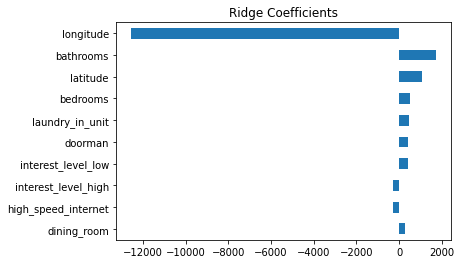

**Note:** Your figure shouldn't be identical to the one above. Your model will have different coefficients since it's been trained on different data. Only the formatting should be the same.

/usr/local/lib/python3.10/dist-packages/category_encoders/utils.py:366: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


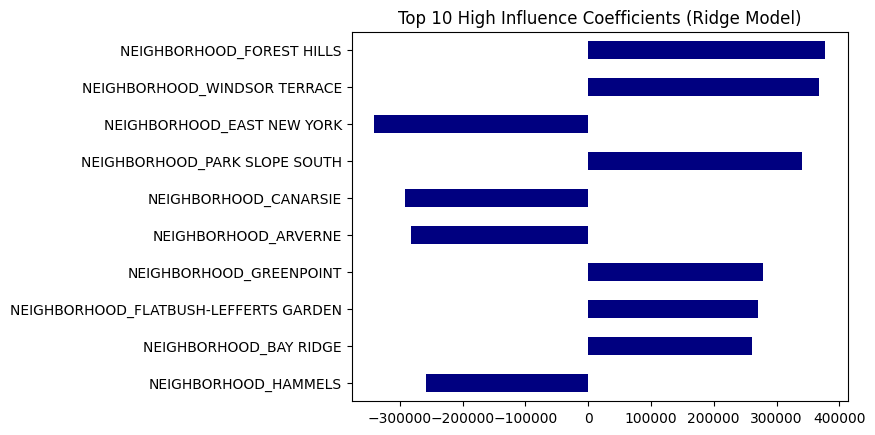

In [67]:
# List of coefficients
coefficients = model_r.coef_

# List of features
features = ohe.get_feature_names()

# Creating Panda Series with features and their coefficients
feature_relevance = pd.Series(coefficients, index=features)

# Ordering Serie by absolute values
feature_relevance = feature_relevance.sort_values(key=abs)

# Ploting the 10 most important coefficients for model_r (Ridge)
feature_relevance.tail(10).plot(kind='barh', color='navy')
plt.title('Top 10 High Influence Coefficients (Ridge Model)');